In [3]:
import os
import pandas as pd 
import numpy as np 
from typing import Tuple, NewType
import PIL.Image 
import utils.helpers as hp 

import matplotlib.pylab as plt
import matplotlib.font_manager as fm

# our scripts 
import src.processing as sp 
import settings as st
import utils.helpers as hp

### Process the CSV file 

In [2]:
# df = sp.correct_location('gz_decals_volunteers_5', save = True, filename = 'gr5_votes')

In [4]:
# df = hp.read_parquet(st.data_dir + '/' + 'descriptions', 'gr5_votes')

### Playground

In [2]:
folder = '/data/phys-zooniverse/phys2286/data/zenodo/'
fname = 'gz_decals_volunteers_5'

In [3]:
csv = hp.load_csv(folder, fname)

In [4]:
csv.head()

,iauname,ra,dec,redshift,elpetro_absmag_r,sersic_nmgy_r,petro_th50,petro_th90,petro_theta,upload_group,...,merging_minor-disturbance_fraction,merging_minor-disturbance_debiased,merging_major-disturbance,merging_major-disturbance_fraction,merging_major-disturbance_debiased,merging_merger,merging_merger_fraction,merging_merger_debiased,wrong_size_statistic,wrong_size_warning
0,J112953.88-000427.4,172.474526,-0.074281,0.124142,-21.253342,167.262880,1.835066,5.414066,4.202472,pre_active,...,0.100,0.127708,5,0.0625,0.076923,0,0.000000,0.000000,133.592684,False
1,J104325.29+190335.0,160.856533,19.060441,0.049088,-21.775410,2941.729200,4.405412,14.320828,10.757237,targeted,...,0.000,0.000000,0,0.0000,0.000000,2,0.057143,0.060757,132.443129,False
2,J104629.54+115415.1,161.623135,11.904197,0.092906,-19.947397,125.076324,4.719870,13.139816,9.726173,active_baseline,...,0.200,NaN,0,0.0000,NaN,0,0.000000,NaN,156.336302,False
3,J082950.68+125621.8,127.461190,12.939386,0.066619,-19.800629,173.592030,2.929065,7.224961,6.528331,active_baseline,...,0.125,NaN,0,0.0000,NaN,0,0.000000,NaN,155.386379,False
4,J122056.00-015022.0,185.233342,-1.839340,0.070042,-19.013256,88.826880,2.521897,6.496888,5.054409,active_baseline,...,0.000,NaN,0,0.0000,NaN,0,0.000000,NaN,143.735491,False


### Edit the PNG Location

The png images are in the folder png/Jxxx/ rather than dr5/Jxxx/

In [13]:
nobject = csv.shape[0]
locations = [csv.png_loc.values[i][4:] for i in range(nobject)]

In [7]:
data_path = '/data/phys-zooniverse/chri5177/galaxy_zoo/decals/dr5/png/'

In [20]:
csv.png_loc = locations

### Check if the PNG image exists

In [17]:
imgs_exists = [int(os.path.isfile(data_path + locations[i])) for i in range(nobject)]

In [23]:
imgs_exists = pd.DataFrame(imgs_exists, columns=['exists'])

In [25]:
pd.concat((csv, imgs_exists), axis =1)

,iauname,ra,dec,redshift,elpetro_absmag_r,sersic_nmgy_r,petro_th50,petro_th90,petro_theta,upload_group,...,merging_minor-disturbance_debiased,merging_major-disturbance,merging_major-disturbance_fraction,merging_major-disturbance_debiased,merging_merger,merging_merger_fraction,merging_merger_debiased,wrong_size_statistic,wrong_size_warning,exists
0,J112953.88-000427.4,172.474526,-0.074281,0.124142,-21.253342,167.262880,1.835066,5.414066,4.202472,pre_active,...,0.127708,5,0.0625,0.076923,0,0.000000,0.000000,133.592684,False,1
1,J104325.29+190335.0,160.856533,19.060441,0.049088,-21.775410,2941.729200,4.405412,14.320828,10.757237,targeted,...,0.000000,0,0.0000,0.000000,2,0.057143,0.060757,132.443129,False,1
2,J104629.54+115415.1,161.623135,11.904197,0.092906,-19.947397,125.076324,4.719870,13.139816,9.726173,active_baseline,...,NaN,0,0.0000,NaN,0,0.000000,NaN,156.336302,False,1
3,J082950.68+125621.8,127.461190,12.939386,0.066619,-19.800629,173.592030,2.929065,7.224961,6.528331,active_baseline,...,NaN,0,0.0000,NaN,0,0.000000,NaN,155.386379,False,1
4,J122056.00-015022.0,185.233342,-1.839340,0.070042,-19.013256,88.826880,2.521897,6.496888,5.054409,active_baseline,...,NaN,0,0.0000,NaN,0,0.000000,NaN,143.735491,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253281,J144017.17+234347.3,220.071553,23.729825,0.135569,-21.286007,125.146090,2.160871,6.818261,5.128151,active_baseline,...,NaN,0,NaN,NaN,0,NaN,NaN,133.141853,False,1
253282,J133751.46+253954.0,204.464417,25.665029,0.031913,-18.737637,342.469800,2.009910,5.407866,4.545066,active_baseline,...,NaN,0,0.0000,NaN,0,0.000000,NaN,148.756371,False,1
253283,J130734.26+061155.7,196.892784,6.198813,0.137835,-21.575876,221.358960,2.213671,7.401498,5.253455,active_baseline,...,NaN,0,0.0000,NaN,0,0.000000,NaN,132.384533,False,1
253284,J163830.70+315116.7,249.627951,31.854632,0.059837,-21.012257,749.883670,17.295427,43.632080,37.860394,active_baseline,...,NaN,0,NaN,NaN,0,NaN,NaN,143.119097,False,1


### Work with the Keys

In [10]:
for key in csv.keys():
    if 'fraction' in key:
        print(f'Key: {key}')

Key: smooth-or-featured_smooth_fraction
Key: smooth-or-featured_featured-or-disk_fraction
Key: smooth-or-featured_artifact_fraction
Key: disk-edge-on_yes_fraction
Key: disk-edge-on_no_fraction
Key: has-spiral-arms_yes_fraction
Key: has-spiral-arms_no_fraction
Key: bar_strong_fraction
Key: bar_weak_fraction
Key: bar_no_fraction
Key: bulge-size_dominant_fraction
Key: bulge-size_large_fraction
Key: bulge-size_moderate_fraction
Key: bulge-size_small_fraction
Key: bulge-size_none_fraction
Key: how-rounded_round_fraction
Key: how-rounded_in-between_fraction
Key: how-rounded_cigar-shaped_fraction
Key: edge-on-bulge_boxy_fraction
Key: edge-on-bulge_none_fraction
Key: edge-on-bulge_rounded_fraction
Key: spiral-winding_tight_fraction
Key: spiral-winding_medium_fraction
Key: spiral-winding_loose_fraction
Key: spiral-arm-count_1_fraction
Key: spiral-arm-count_2_fraction
Key: spiral-arm-count_3_fraction
Key: spiral-arm-count_4_fraction
Key: spiral-arm-count_more-than-4_fraction
Key: spiral-arm-coun

In [8]:
csv['petro_theta'].describe()

count    253286.000000
mean          7.930114
std           8.465353
min           3.000635
25%           4.501389
50%           5.927420
75%           8.314960
max         254.770650
Name: petro_theta, dtype: float64

In [11]:
csv['has-spiral-arms_yes_fraction'].describe()

count    168503.000000
mean          0.398693
std           0.422784
min           0.000000
25%           0.000000
50%           0.250000
75%           0.904762
max           1.000000
Name: has-spiral-arms_yes_fraction, dtype: float64

### Suggested Cuts

In [20]:
csv[(csv['has-spiral-arms_yes_fraction'] > 0.75) & (csv['has-spiral-arms_yes'] > 20)].shape

(10258, 127)

In [22]:
csv[(csv['smooth-or-featured_smooth_fraction'] > 0.75) & (csv['smooth-or-featured_smooth'] > 20) & (csv['merging_none_fraction'] > 0.75)].shape

(7739, 127)

In [37]:
csv[csv['bulge-size_dominant_fraction']>0.90]['png_loc'].iloc[0:5]

34     dr5/J093/J093612.36+273050.7.png
96     dr5/J230/J230854.69+131810.9.png
138    dr5/J004/J004448.59+171939.5.png
208    dr5/J104/J104723.50+302158.0.png
431    dr5/J132/J132824.04-021946.0.png
Name: png_loc, dtype: object

### View Some Images

In [6]:
PILimage = NewType('PILimage', classmethod)

def load_image(data_dir: str, filename: str) -> Tuple[PILimage, np.ndarray]:
    """Load the image in both PIL and numpy format. We might want to use the numpy array only.

    Args:
        data_dir (str): the full path where the image is located
        filename (str): the name of the image

    Returns:
        Tuple[PIL.PngImagePlugin.PngImageFile, np.ndarray]: PIL image with all descriptions, numpy array of the image
    """

    # image in PIL format
    im_pil = PIL.Image.open(data_dir + filename).convert("RGB")

    # image as a numpy array
    im_arr = np.asarray(im_pil)

    return im_pil, im_arr

In [38]:
pil, arr = load_image('/data/phys-zooniverse/chri5177/galaxy_zoo/decals/dr5/png/', 'J132/J132824.04-021946.0.png')

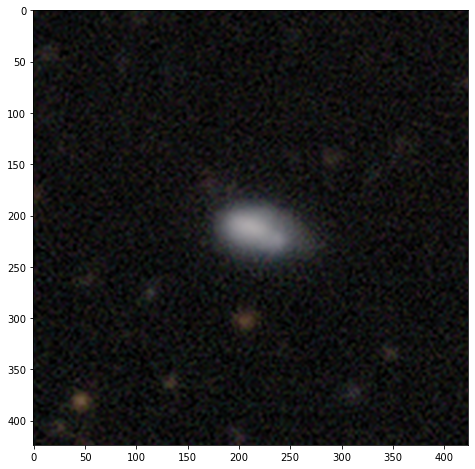

In [39]:
plt.figure(figsize = (8,8))
plt.imshow(pil)
plt.show()